In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/research-summer2020/code')
# import suave
import globals
globals.initialize_vals()

In [2]:
# equation from Weinberg, OSU
def std(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1)))
    return std

In [3]:
# let's take an example case
L = 750
n = '1e-4'
m = 1
b = 0.5
rlz = 0

In [4]:
cat_tag = f'L{L}_n{n}_z057_patchy_As2x'

In [5]:
mock_name = f'{cat_tag}_rlz{rlz}_m-{m:.3f}-L_b-{b:.3f}'

In [6]:
# try taking the value of the correlation function at a representative separation r : P(k) --> xi(r)

#### suave dictionary

In [7]:
suave_dict = np.load(os.path.join(globals.grad_dir, f'suave_data/{cat_tag}/bao_fixed/{mock_name}.npy'), allow_pickle=True).item()

In [8]:
suave_dict.keys()

dict_keys(['grad_recovered', 'mean_sq_err', 'r_avg', 'amps', 'r_fine', 'xi_locs', 'proj_type', 'projfn', 'weight_type'])

#### fixed bao basis (fiducial cosmology)

In [9]:
fixed_basis = np.loadtxt(os.path.join(globals.data_dir, 'bases/bao_fixed/cosmo_basis.dat'))

#### iterative bao basis

In [10]:
iter_basis = np.loadtxt(os.path.join(globals.data_dir, f'bases/bao_iterative/results/results_gradient_{cat_tag}/final_bases/basis_gradient_{mock_name}_trrnum_3x.dat'))

### compare bases

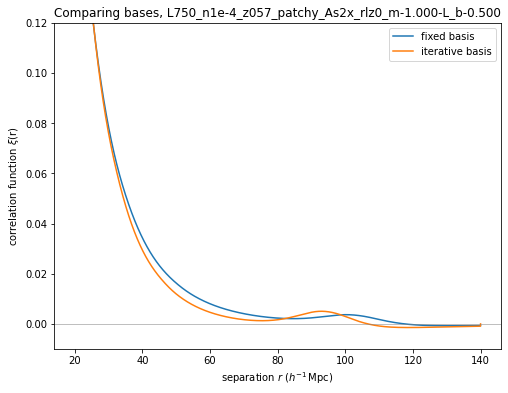

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(fixed_basis[:,0], fixed_basis[:,1], label='fixed basis')
ax.plot(iter_basis[:,0], iter_basis[:,1], label='iterative basis')

ax.axhline(0, color='grey', lw=0.5)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_ylim((-0.01, 0.12))
ax.set_title(f'Comparing bases, {mock_name}')

plt.legend()

In [12]:
# let's naively take the value of xi at r=40 to calculate our precision scalings

In [13]:
fixed_basis[:,0] - iter_basis[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
r = fixed_basis[:,0]

In [15]:
# closest r value to 40:
r_40 = min(r, key=lambda x:abs(x-40))
r_40

39.989994997498755

In [16]:
# xi value:
xi = iter_basis[np.where(r==r_40)]
xi

array([[3.99899950e+01, 2.94641464e-02]])

In [17]:
# for now, take 'P' in the equation to be xi at this representative r
P = xi[:,1]
P

array([0.02946415])

In [18]:
V = L**3

In [19]:
# at other values
std_n1 = std(V, 1e-4, P)
std_n2 = std(V, 2e-4, P)
stds = np.array([std_n1, std_n2])